In [4]:
# for data storage
import numpy as np
import pandas as pd

# for visualizing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


dataset = pd.read_csv("/content/ped_crashes_2.csv")


print(dataset.columns)

# In the dataset, Gender, Age and Speed limit are the columns in which, we have some wrong values
# In the column of weather conditions, we mostly have uncoded or wrong values so we can consider to drop that column
# The rest of the columns have data in them











Index(['Crash Year', 'Crash Month', 'Crash Day', 'Time of Day', 'Day of Week',
       'City or Township', 'Crash: Intersection', 'Crash: Hit-and-Run',
       'Lighting Conditions', 'Weather Conditions (2016+)',
       'Speed at Crash Site', 'Worst Injury in Crash', 'Party Type',
       'Person Age', 'Person Gender'],
      dtype='object')


In [5]:
dataset.drop('Person Gender', axis=1, inplace=True)

dataset.head()




,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed at Crash Site,Worst Injury in Crash,Party Type,Person Age
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44
2,2018,February,1,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid


      Crash Year Crash Month  Crash Day            Time of Day Day of Week  \
0           2018    February          1     9:00 AM - 10:00 AM    Thursday   
1           2018    February          1      7:00 PM - 8:00 PM    Thursday   
2           2018    February          1  11:00 AM - 12:00 noon    Thursday   
3           2018    February          1      6:00 PM - 7:00 PM    Thursday   
4           2018       March          1      2:00 PM - 3:00 PM    Thursday   
...          ...         ...        ...                    ...         ...   
6803        2010         May         31      2:00 PM - 3:00 PM      Monday   
6804        2010        July         31      2:00 AM - 3:00 AM    Saturday   
6805        2010      August         31      2:00 PM - 3:00 PM     Tuesday   
6806        2010     October         31      8:00 PM - 9:00 PM      Sunday   
6807        2010    December         31      1:00 PM - 2:00 PM      Friday   

           City or Township     Crash: Intersection Crash: Hit-

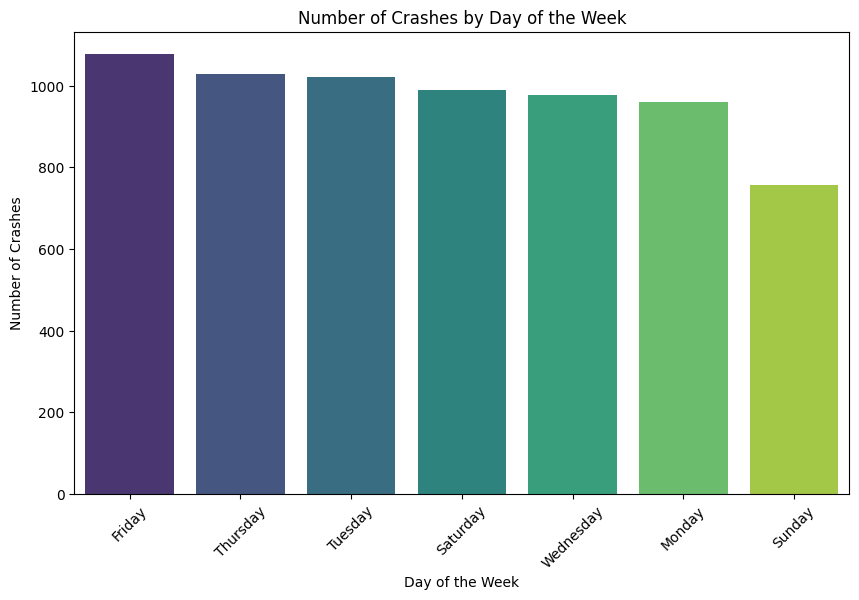

In [7]:
# Q1 Can we identify the day of the week with the highest fatality rate in traffic accidents
# and use this information to allocate resources more effectively?


import seaborn as sns

crash_condition = (dataset['Crash: Intersection'] == 'Intersection crash') | (dataset['Crash: Hit-and-Run'] == 'Hit-and-run')

crashes = dataset[crash_condition]

day_counts = dataset['Day of Week'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Day of the Week')
plt.xticks(rotation=45)

# Show the plot
plt.show()

<ipython-input-9-62cc72af237c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes['Speed at Crash Site'] = crashes['Speed at Crash Site'].replace('Uncoded & errors', np.nan)
<ipython-input-9-62cc72af237c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes['Speed at Crash Site'] = pd.to_numeric(crashes['Speed at Crash Site'], errors='coerce')
<ipython-input-9-62cc72af237c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

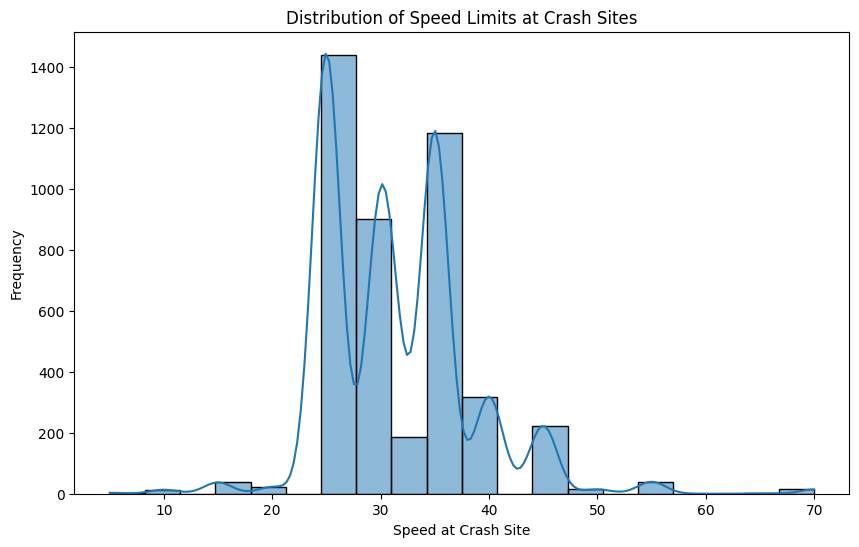

In [9]:
# Q2 How does the average speed at crash sites correlate with the number of number of accidents,
# and can we use this information to target speed limit enforcement or road safety campaigns more effectively?

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', 'warn')



# numeric_count = dataset['Speed Limit at Crash Site'].apply(lambda x: str(x).isnumeric()).sum()

# # Find the count of 'Uncoded & errors' values
# uncoded_error_count = (dataset['Speed Limit at Crash Site'] == 'Uncoded & errors').sum()

# # Print the counts
# print(f'Numeric Values Count: {numeric_count}')
# print(f'Uncoded & Errors Count: {uncoded_error_count}')

# After counting the numeric values of the speed limit and the uncoded & error values,
# we see that the numeric count is 6530 and uncoded & error count is 279 which is only 4.2% of the original data
# However, since we are using speed at crash site for analysis, it makes sense to fill the uncoded & error values with mean


crash_condition = (dataset['Crash: Intersection'] == 'Intersection crash') | (dataset['Crash: Hit-and-Run'] == 'Hit-and-run')

crashes = dataset[crash_condition]


# First, convert the 'Uncoded & Errors' values to NaN
crashes['Speed at Crash Site'] = crashes['Speed at Crash Site'].replace('Uncoded & errors', np.nan)

# Then, convert the column to numeric (this will automatically handle NaN values)
crashes['Speed at Crash Site'] = pd.to_numeric(crashes['Speed at Crash Site'], errors='coerce')

# Calculate the mean of valid speed limits (excluding NaN values)
mean_speed_limit = crashes['Speed at Crash Site'].mean()

# Finally, fill NaN values with the calculated mean
crashes['Speed at Crash Site'].fillna(mean_speed_limit, inplace=True)


plt.figure(figsize=(10, 6))
sns.histplot(crashes['Speed at Crash Site'], bins=20, kde=True)
plt.title('Distribution of Speed Limits at Crash Sites')
plt.xlabel('Speed at Crash Site')
plt.ylabel('Frequency')
plt.show()





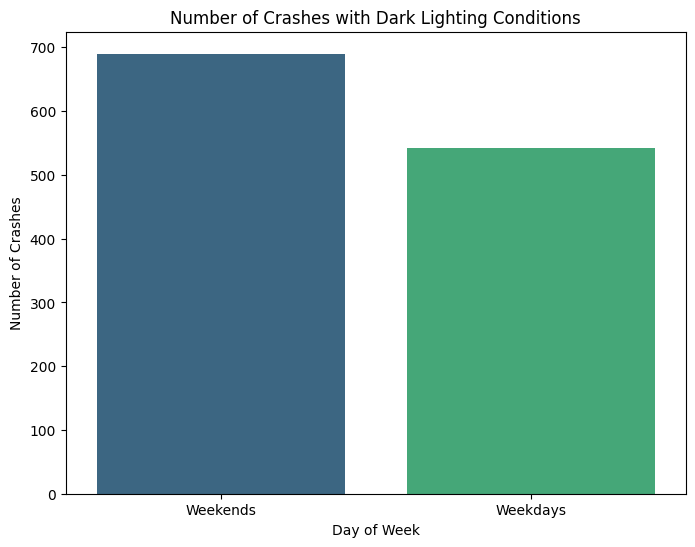

In [11]:
# Q3 Do certain days with dark light conditions, especially on weekends, exhibit a higher frequency of accidents compared to weekdays,
# and how can this information inform traffic management strategies or public awareness campaigns?


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter out the weekends crashes in the dark lighting conditions
weekend_dark_crashes = dataset[(dataset['Day of Week'].isin(['Saturday', 'Sunday'])) & (dataset['Lighting Conditions'] == 'Dark lighted')]

# Fliter out the crashes on monday and tuesday with dark lighting conditions
weekday_dark_crashes = dataset[(dataset['Day of Week'].isin(['Monday', 'Tuesday'])) & (dataset['Lighting Conditions'] == 'Dark lighted')]

# Count the number of crashes
weekend_dark_crash_count = len(weekend_dark_crashes)
weekday_dark_crash_count = len(weekday_dark_crashes)


plt.figure(figsize=(8, 6))
sns.barplot(x=['Weekends', 'Weekdays'], y=[weekend_dark_crash_count, weekday_dark_crash_count], palette='viridis')
plt.title('Number of Crashes with Dark Lighting Conditions')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.show()






In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings


# Clean the data
# Remove the columns which will not be used in creating the model
crashes = pd.read_csv("/content/ped_crashes_2.csv")
crashes = crashes.drop("Person Gender", axis = 1)
crashes = crashes.drop("Person Age", axis = 1)
crashes = crashes.drop("Worst Injury in Crash", axis = 1)
crashes = crashes.drop("Party Type", axis = 1)
crashes = crashes.drop("Weather Conditions (2016+)", axis = 1)
crashes = crashes.drop("City or Township", axis = 1)
crashes = crashes.drop("Time of Day", axis = 1)



# Find the mean values of the speed and replace the uncoded & error values with the mean speed
crashes['Speed at Crash Site'] = pd.to_numeric(crashes['Speed at Crash Site'], errors='coerce')

mean_speed = crashes['Speed at Crash Site'].mean()

crashes['Speed at Crash Site'].fillna(mean_speed, inplace=True)

# Convert the month column to their corresponding number so they can fit better in the model
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12,
}

crashes['Crash Month'] = crashes['Crash Month'].map(month_to_number)


# Convert the day of week column to their corresponding number so they can fit better in the model
day_to_number = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7,
}

crashes['Day of Week'] = crashes['Day of Week'].map(day_to_number)


# Convert the Crash: Intersection column values to boolean True and False so that they fit better in the model
crashes['Crash: Intersection'] = crashes['Crash: Intersection'] == 'Intersection crash'


# Convert the Crash: Hit-and-Run column values to boolean True and False so that they fit better in the model
crashes['Crash: Hit-and-Run'] = crashes['Crash: Hit-and-Run'] == 'Hit-and-run'


# Remove the rows with the Uncoded & error values, Unknown and Other / unknown values in the column Lighting Conditions
crashes = crashes[(crashes['Lighting Conditions'] != 'Unknown') & (crashes['Lighting Conditions'] != 'Other / unknown') & (crashes['Lighting Conditions'] != 'Uncoded & errors')]


# Changing the values in the Lighting Conditions column so that they fit better in the regression
lighting_conditions_to_number = {
    'Daylight': 1,
    'Dark lighted': 2,
    'Dusk': 3,
    'Dark unlighted': 4,
    'Dawn': 5,
}

crashes['Lighting Conditions'] = crashes['Lighting Conditions'].map(lighting_conditions_to_number)


crashes.to_csv("output.csv", index=False)



In [ ]:
# Split the dataset to X and Y variables

X = crashes.drop(["Speed at Crash Site"], axis=1)
X

Y = crashes["Speed at Crash Site"]
Y

0       35.0
1       30.0
2       30.0
3       30.0
4       25.0
        ... 
6804    25.0
6805    40.0
6806    15.0
6807    35.0
6808    35.0
Name: Speed at Crash Site, Length: 6752, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2)

X_train.shape, Y_train.shape

((5401, 7), (5401,))

In [ ]:
X_test.shape, Y_test.shape

((1351, 7), (1351,))

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 0.04566973 -0.012545   -0.01482161  0.12746773 -1.48886225 -2.95206575
  1.18950424]
Intercept: -59.860942643833766
Mean squared error (MSE): 84.17
Coefficient of determination (R^2): 0.04


In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
np.array(Y_test)


array([35., 35., 40., ..., 35., 45., 25.])

In [ ]:
Y_pred

array([34.71643611, 38.23885401, 32.92053154, ..., 33.05637881,
       33.30692968, 37.42135139])

<Axes: xlabel='Speed at Crash Site'>

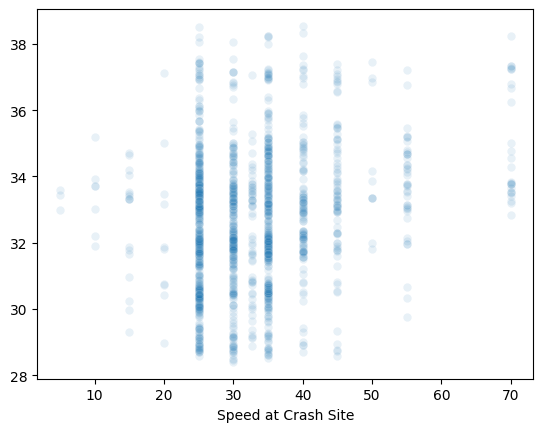

In [ ]:
sns.scatterplot(x=Y_test,y=Y_pred, alpha=0.1)